In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('/kaggle/input/tuberculosis-chest-xrays-shenzhen/shenzhen_metadata.csv')

In [6]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
df

,study_id,sex,age,findings
0,CHNCXR_0001_0.png,Male,45,normal
1,CHNCXR_0002_0.png,Male,63,normal
2,CHNCXR_0003_0.png,Female,48,normal
3,CHNCXR_0004_0.png,Male,58,normal
4,CHNCXR_0005_0.png,Male,28,normal
...,...,...,...,...
657,CHNCXR_0658_1.png,Male,41,bilateral secondary PTB with right pneumothorax
658,CHNCXR_0659_1.png,Male,33,secondary PTB in the left upper field
659,CHNCXR_0660_1.png,Male,50,1.bilateral secondary PTB with right upper at...
660,CHNCXR_0661_1.png,Male,26,bilateral secondary PTB with right pleural th...


In [8]:
df['target']=df['findings'].apply(lambda x:0 if x=='normal' else 1)

In [9]:
df

,study_id,sex,age,findings,target
0,CHNCXR_0001_0.png,Male,45,normal,0
1,CHNCXR_0002_0.png,Male,63,normal,0
2,CHNCXR_0003_0.png,Female,48,normal,0
3,CHNCXR_0004_0.png,Male,58,normal,0
4,CHNCXR_0005_0.png,Male,28,normal,0
...,...,...,...,...,...
657,CHNCXR_0658_1.png,Male,41,bilateral secondary PTB with right pneumothorax,1
658,CHNCXR_0659_1.png,Male,33,secondary PTB in the left upper field,1
659,CHNCXR_0660_1.png,Male,50,1.bilateral secondary PTB with right upper at...,1
660,CHNCXR_0661_1.png,Male,26,bilateral secondary PTB with right pleural th...,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: xlabel='sex', ylabel='count'>

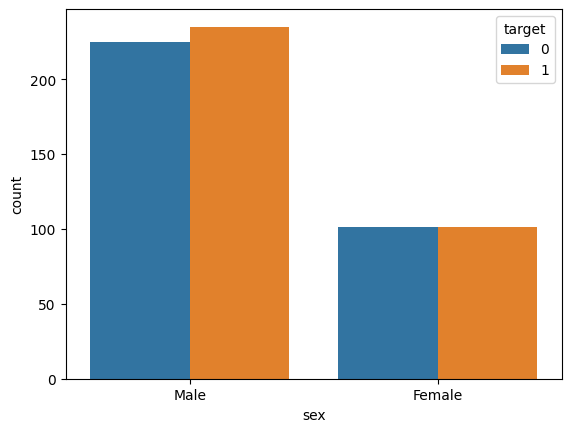

In [10]:
sns.countplot(data=df,x='sex',hue='target')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: xlabel='target', ylabel='age'>

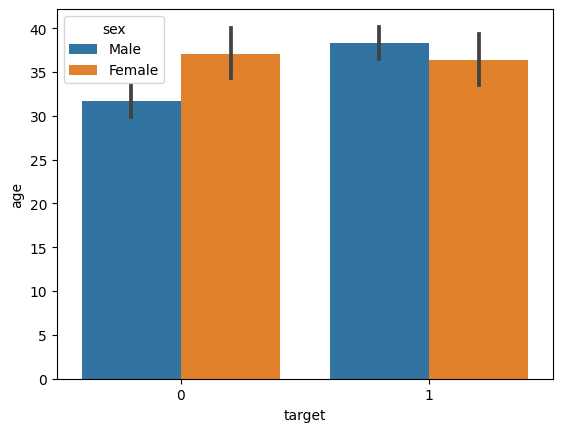

In [11]:
sns.barplot(data=df,x='target',y='age',hue='sex')

In [12]:
df['target'].value_counts()

target
1    336
0    326
Name: count, dtype: int64

(2919, 3000, 4)
(2951, 3000, 4)
(2945, 2987, 4)
(2933, 3000, 4)
(2933, 3000, 4)


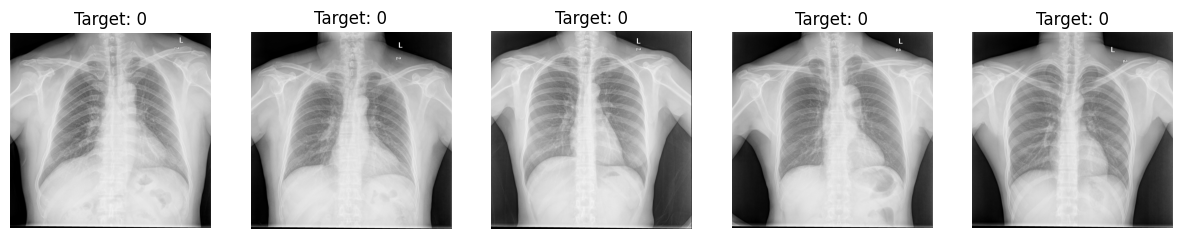

In [13]:
# Filter the DataFrame to get rows with target 0
target_0_df = df[df['target'] == 0].head(5)

# Display the images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, (index, row) in enumerate(target_0_df.iterrows()):
    image_path ='/kaggle/input/tuberculosis-chest-xrays-shenzhen/images/images/'+row['study_id']
    image = plt.imread(image_path)
    print(image.shape)
    axes[i].imshow(image)
    axes[i].set_title(f'Target: {row["target"]}')
    axes[i].axis('off')

plt.show()

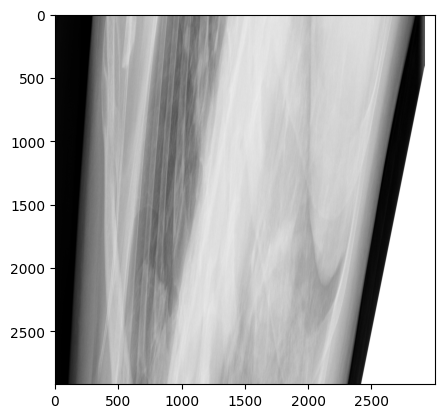

In [14]:
from PIL import Image, ImageFilter, ImageOps

def shear_image(image_path, shx=0.2, shy=0.0):
    # Open the image
    img = Image.open(image_path)

    # Get the size of the image
    width, height = img.size

    # Define the shear matrix
    shear_matrix = [1, shx, 0, 1, 0, 0]

    # Apply the shear transformation using the transform() method
    img_sheared = img.transform((width, height), Image.AFFINE, shear_matrix)

    # Display the original and sheared images side by side
    plt.imshow(img_sheared)
    plt.plot()

# Example usage
shear_image('/kaggle/input/tuberculosis-chest-xrays-shenzhen/images/images/'+df['study_id'][0], shx=0.2, shy=0.0)


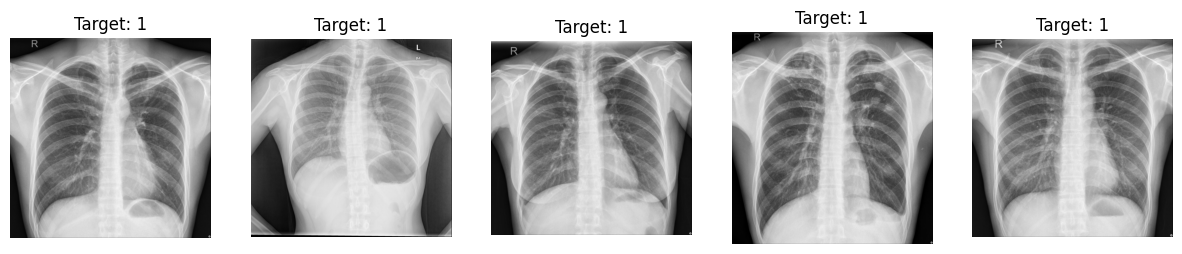

In [15]:
# Filter the DataFrame to get rows with target 1
target_0_df = df[df['target'] == 1].head(5)

# Display the images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, (index, row) in enumerate(target_0_df.iterrows()):
    image_path ='/kaggle/input/tuberculosis-chest-xrays-shenzhen/images/images/'+row['study_id']
    image = plt.imread(image_path)

    axes[i].imshow(image)
    axes[i].set_title(f'Target: {row["target"]}')
    axes[i].axis('off')

plt.show()

In [16]:
def show_image(target):
    # Filter the DataFrame to get rows with given target
    target_0_df = df[df['target'] == target].sample(5)

    # Display the images
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    for i, (index, row) in enumerate(target_0_df.iterrows()):
        image_path ='/kaggle/input/tuberculosis-chest-xrays-shenzhen/images/images/'+row['study_id']
        image = plt.imread(image_path)

        axes[i].imshow(image)
        axes[i].set_title(f'Target: {row["target"]}')
        axes[i].axis('off')

    plt.show()

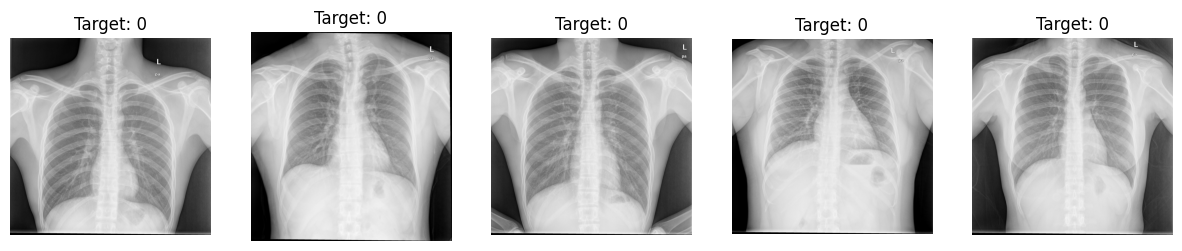

In [17]:
show_image(0)

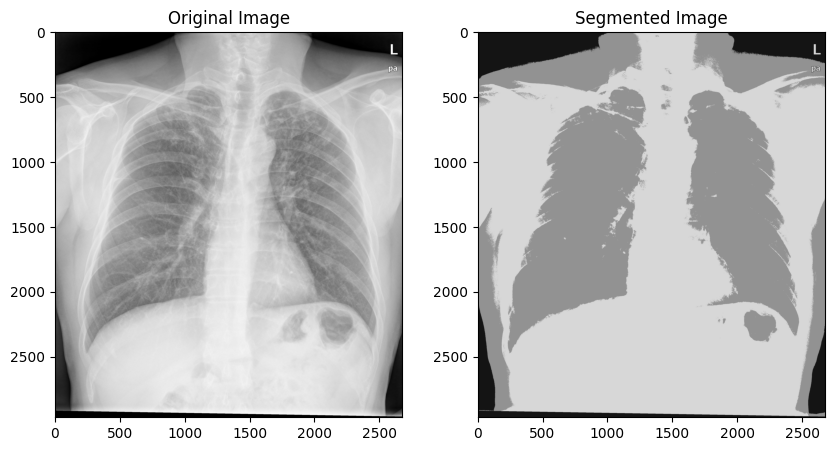

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_segmentation(image_path, k=3):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Flatten the image into a 2D array of pixels
    pixels = image_rgb.reshape((-1, 3))
    
    # Convert to float32 for k-means
    pixels = np.float32(pixels)
    
    # Define criteria and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert back to uint8 and reshape to the original image shape
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()].reshape(image.shape)
    
    return segmented_image

# Example usage
base_path='/kaggle/input/tuberculosis-chest-xrays-shenzhen/images/images/'
image_path = base_path+df['study_id'][560]  # Replace with the path to your image
segmented_image = color_segmentation(image_path)

# Display the original and segmented images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[1].imshow(segmented_image)
axes[1].set_title('Segmented Image')
plt.show()


In [19]:
# pip install segmentation-models


In [20]:
def show_segmented_image(target):
    # Filter the DataFrame to get rows with given target
    target_0_df = df[df['target'] == target].sample(5)

    # Display the images
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    for i, (index, row) in enumerate(target_0_df.iterrows()):
        image_path =base_path+row['study_id']
        segmented_image = color_segmentation(image_path)
        

        axes[i].imshow(segmented_image)
        axes[i].set_title(f'Target: {row["target"]}')
        axes[i].axis('off')

    plt.show()

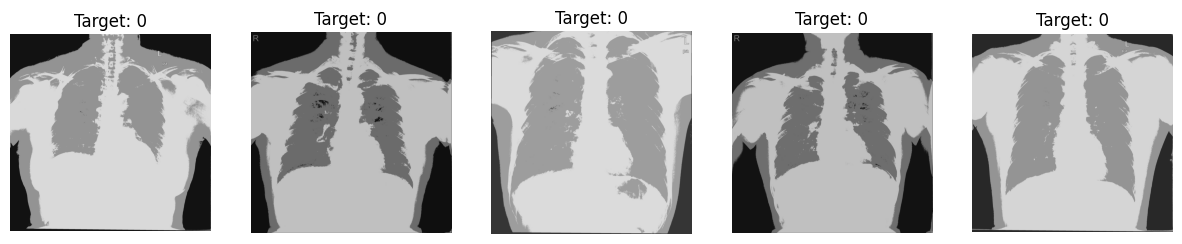

In [21]:
show_segmented_image(0)

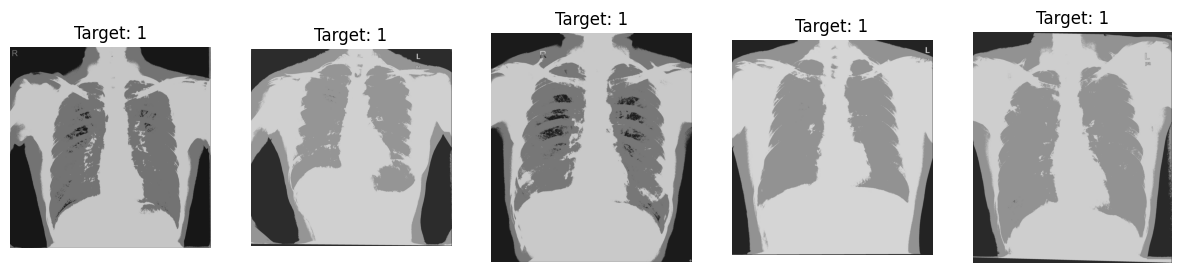

In [22]:
show_segmented_image(1)

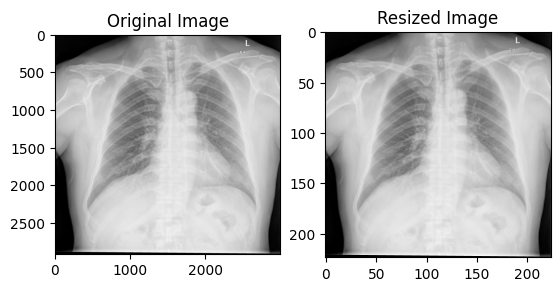

In [23]:
def resize_image_with_display(image_path, new_width=None, new_height=None, scale_factor=None):
    """
    Resize an image and display the result using Matplotlib.

    Parameters:
    - image_path: The path to the input image.
    - new_width: The new width of the image (optional).
    - new_height: The new height of the image (optional).
    - scale_factor: The scaling factor for resizing (optional).
      If both new_width and new_height are None, the image will be resized
      by the specified scale_factor.

    Note: Specify either new_width and/or new_height, or use scale_factor.
    """
    # Read the image
    img = cv2.imread(image_path)

    # Get the original dimensions of the image
    height, width = img.shape[:2]

    # Check if either new_width or new_height is specified
    if new_width is not None and new_height is not None:
        dim = (new_width, new_height)
    elif scale_factor is not None:
        # Compute the new dimensions based on the scale factor
        dim = (int(width * scale_factor), int(height * scale_factor))
    else:
        raise ValueError("Specify either new_width and/or new_height, or use scale_factor.")

    # Resize the image
    resized_img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

    # Display the original and resized images using Matplotlib
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(122), plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)), plt.title('Resized Image')
    plt.show()

# Example usage:
# Resize by specifying new width and height
resize_image_with_display(base_path+df['study_id'][0], new_width=224, new_height=224)


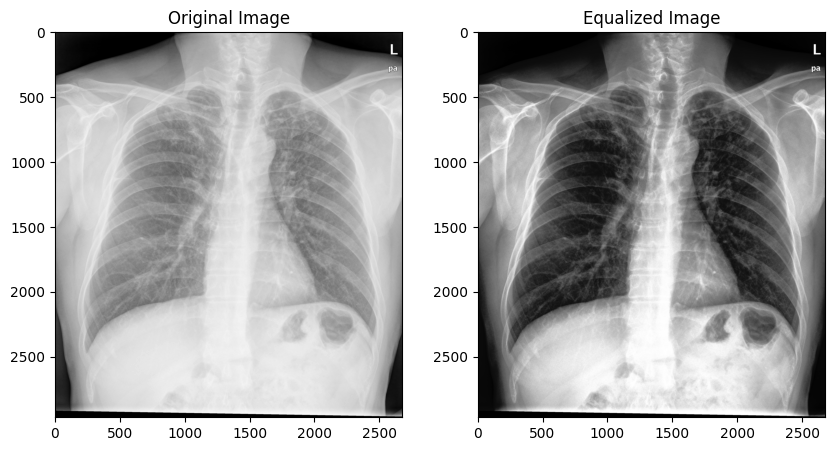

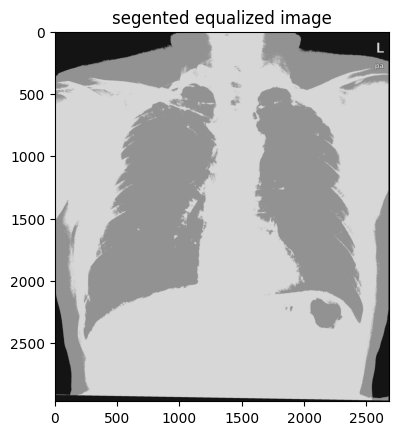

In [24]:
def histogram_equalization(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply histogram equalization
    equalized_img = cv2.equalizeHist(img)
    
    # Display the original and equalized images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(equalized_img, cmap='gray')
    plt.title('Equalized Image')
    
    plt.show()

# Example usage
image_path =  base_path+df['study_id'][560]  # Replace with the path to your image
histogram_equalization(image_path)
segmented_image = color_segmentation(image_path)
plt.imshow(segmented_image,cmap='gray')
plt.title('segented equalized image')
plt.show()



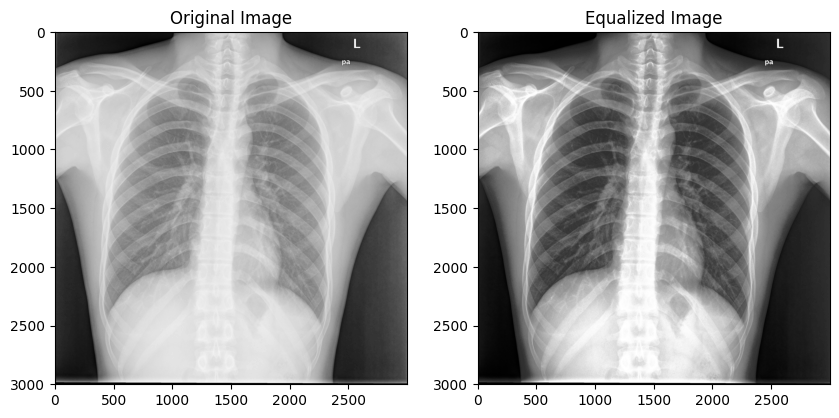

In [25]:
image_path =  base_path+df['study_id'][100]  # Replace with the path to your image
histogram_equalization(image_path)

In [26]:
# df=df.drop('equalized_filename',axis=1)

In [27]:
def preprocess_image(image_path, equalize_hist=True):
    img = cv2.imread(image_path)
    # Your image processing logic here
    if equalize_hist:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.equalizeHist(img)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    return img


In [28]:
import os

In [29]:
df['equalized_filename'] = df['study_id'].apply(lambda x: base_path+x)

# Save the processed images as separate files
output_dir = '/kaggle/working/processed_images'
os.makedirs(output_dir, exist_ok=True)

for index, row in df.iterrows():
    image_path = row['equalized_filename']
    processed_image = preprocess_image(image_path, equalize_hist=True)
    processed_image_path = os.path.join(output_dir, f"{row['study_id']}_equalized.jpg")
    cv2.imwrite(processed_image_path, cv2.cvtColor(processed_image, cv2.COLOR_RGB2BGR))

# Now update the DataFrame with the new file paths
df['equalized_filename'] = df['study_id'].apply(lambda x: os.path.join(output_dir, f"{x}_equalized.jpg"))


In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
df['target'] = df['target'].astype(str)

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['target'], random_state=42)

# Set up data generators
batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='equalized_filename',
    y_col='target',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Set class_mode to 'binary'
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_dataframe(
    val_df,
    x_col='equalized_filename',
    y_col='target',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Set class_mode to 'binary'
    subset='validation'
)

Found 424 validated image filenames belonging to 2 classes.
Found 26 validated image filenames belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [32]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained ResNet-50
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 24112513 (91.98 MB)
Trainable params: 524801 (2.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [33]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)


Epoch 1/20
14/14 [==============================] - 50s 2s/step - loss: 0.7538 - accuracy: 0.5236 - val_loss: 0.7261 - val_accuracy: 0.3462
Epoch 2/20
14/14 [==============================] - 35s 3s/step - loss: 0.7008 - accuracy: 0.5212 - val_loss: 0.6663 - val_accuracy: 0.7308
Epoch 3/20
14/14 [==============================] - 35s 2s/step - loss: 0.6874 - accuracy: 0.5637 - val_loss: 0.6982 - val_accuracy: 0.3462
Epoch 4/20
14/14 [==============================] - 35s 2s/step - loss: 0.6447 - accuracy: 0.6486 - val_loss: 0.5877 - val_accuracy: 0.7692
Epoch 5/20
14/14 [==============================] - 35s 2s/step - loss: 0.6405 - accuracy: 0.6226 - val_loss: 0.7587 - val_accuracy: 0.3846
Epoch 6/20
14/14 [==============================] - 34s 2s/step - loss: 0.6207 - accuracy: 0.6321 - val_loss: 0.8096 - val_accuracy: 0.3462
Epoch 7/20
14/14 [==============================] - 34s 2s/step - loss: 0.6289 - accuracy: 0.6392 - val_loss: 0.5480 - val_accuracy: 0.8077
Epoch 8/20
14/14 [==

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_test_pred = model.predict(X_test_processed)

# Convert probabilities to binary predictions (0 or 1)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

NameError: name 'X_test_processed' is not defined

In [ ]:
from tqdm import tqdm
from tensorflow import keras
image_dir = "/kaggle/input/tuberculosis-chest-xrays-shenzhen/images/images"
n_samples = 3

labels_list = df["target"].value_counts().keys().to_list()

img_samples = {label_: list() for label_ in labels_list}
for label_ in img_samples.keys():
    img_samples_ = df.loc[df["target"] == label_]["study_id"].sample(n_samples)
    img_samples[label_] = img_samples_

# Get all image arrays
img_arrs = {name_: None for name_ in df["study_id"]}
for name_ in tqdm(img_arrs.keys()):
    image = keras.preprocessing.image.load_img(
        os.path.join(image_dir, name_),
        target_size=(224, 224), color_mode="grayscale"
    )
    image_arr = keras.preprocessing.image.img_to_array(image, data_format="channels_last", dtype=None)
    img_arrs[name_] = image_arr

In [ ]:
from skimage.exposure import equalize_adapthist
from skimage.filters import threshold_isodata, gaussian

# Predict on the validation generator
y_pred_prob = model.predict(validation_generator)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get the true labels from the validation generator
y_true = validation_generator.classes

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1']))

In [ ]:
data = [arr_ for arr_ in img_arrs_preprocessed.values()]
data = np.array(data)

In [ ]:
binary_labels = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(data, binary_labels, test_size=0.2,
                                                random_state=42)

In [ ]:
X_train[0].shape

In [ ]:


# Assuming X_train and X_test are arrays of grayscale images
# and y_train, y_test are the corresponding binary labels

# Convert grayscale to RGB without introducing an extra dimension
X_train_rgb = np.repeat(X_train[..., np.newaxis], 3, axis=-1)
X_test_rgb = np.repeat(X_test[..., np.newaxis], 3, axis=-1)

# Preprocess the images for ResNet50
X_train_processed = np.array([tf.keras.applications.resnet.preprocess_input(img) for img in X_train_rgb])
X_train_processed = np.squeeze(X_train_processed, axis=3)
X_test_processed = np.array([tf.keras.applications.resnet.preprocess_input(img) for img in X_test_rgb])
X_test_processed = np.squeeze(X_test_processed, axis=3)

# Create ResNet50 base model (pre-trained on ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom head to the model
input_layer = Input(shape=(224, 224, 3))
x = base_model(input_layer)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Create the final model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
X_train_processed.shape

In [ ]:
y_test[0]

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
# Train the model
resnet50_history=model.fit(X_train_processed, y_train, epochs=50, validation_data=(X_test_processed, y_test))


In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, title):
    # Plot training history
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    # Set y-axis limits to [0, 1]
    plt.ylim(0, 1)
    plt.show()

# Assuming you have two model histories named 'history_processed' and 'history_original'
# You can use the function to plot each history separately

plot_training_history(history, title='Processed Image Model')
plot_training_history(resnet50_history, title='Gaussian Preprocess Image Model')


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a trained model named 'model' and validation data 'X_val_processed', 'y_val'
# Replace 'model' and data with your actual model and data

# Predict on the validation set
y_test_pred = model.predict(X_test_processed)

# Convert probabilities to binary predictions (0 or 1)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# from tensorflow.keras.applications import DenseNet121

In [ ]:
# from tensorflow.keras.optimizers import Adam
# base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze the layers of the base model
# for layer in base_model.layers[:118]:
#     layer.trainable = False

# # Add custom head to the model
# input_layer = Input(shape=(224, 224, 3))
# x = base_model(input_layer)
# x = GlobalAveragePooling2D()(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.5)(x)  # Add dropout
# output_layer = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# # Create the final model
# model = Model(inputs=input_layer, outputs=output_layer)

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.summary()

In [ ]:
# # # Import necessary libraries
# # import tensorflow_addons as tfa
# # from tensorflow.keras import metrics
# # from tensorflow_addons.metrics import F1Score, MatthewsCorrelationCoefficient
# # from tensorflow.keras.optimizers import Adam

# # # Define list of metrics to be used
# # metrics = [
# #     'accuracy',
# #     metrics.Precision(name='precision'),
# #     metrics.Recall(name='recall'),
# #     F1Score(num_classes=1, name='f1'),
# # ]

# # # Define learning rate and compile the model
# # # lr = 0.0001
# # model.compile(optimizer='adam', loss="binary_crossentropy", metrics=metrics)
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# # Define callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [ ]:
# Densenet121_history=model.fit(X_train_processed, y_train, epochs=20, validation_data=(X_test_processed, y_test),callbacks=[early_stopping, reduce_lr])

In [ ]:
y_train[0]

In [ ]:
# # Predict on the validation set
# y_val_pred = model.predict(X_test_processed)

# # Convert probabilities to binary predictions (0 or 1)
# y_val_pred_binary = (y_test_pred > 0.5).astype(int)

# # Create confusion matrix
# conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

# # Print classification report
# print("Classification Report:")
# print(classification_report(y_test, y_test_pred_binary))

# # Plot confusion matrix
# plt.figure(figsize=(6, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
# plt.title('Confusion Matrix - Validation Set')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()